# Analysing Income Based on University Major

For this analysis we will be using a dataset that contains information about initial earnings of university graduates based on their majors. (This is definitely not me checking to see if I should regret my choice of major.)

For this project one of the key skills I aim to practice is my data visualisation techniques.

Let's start by importing the data and getting a feel for it:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

recent_grads = pd.read_csv('recent-grads.csv')

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
print(recent_grads.head())
print('\n')
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Now let's drop rows with missing values

In [6]:
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
cleaned_data_count = recent_grads.shape
cleaned_data_count

(172, 21)

## Data visualisations

In order to get a better feel for the patterns in this data, we will visualise it and examine the data correlations.

Text(0.5, 1.0, 'Number of students and median salary')

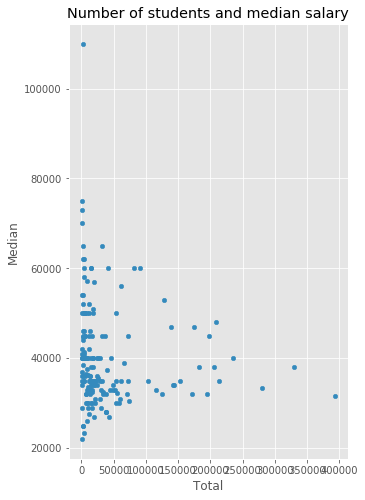

In [9]:
# Sample size and Median
ax1 = recent_grads.plot(x='Total', y='Median', kind='scatter', figsize=(5,8))
ax1.set_title('Number of students and median salary')

Text(0.5, 1.0, 'Number of students and unemployment rate')

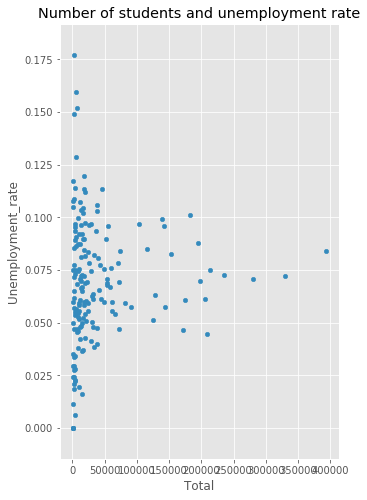

In [10]:
ax2 = recent_grads.plot(x='Total', y='Unemployment_rate', kind='scatter', figsize=(5,8))
ax2.set_title('Number of students and unemployment rate')

Text(0.5, 1.0, 'Full time job and median salary')

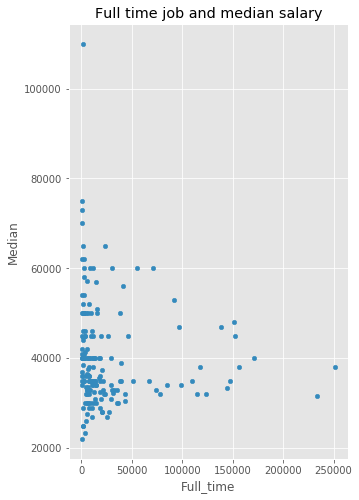

In [11]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter', figsize=(5,8))
ax3.set_title('Full time job and median salary')

Text(0.5, 1.0, 'Share of women in major and unemployment rate')

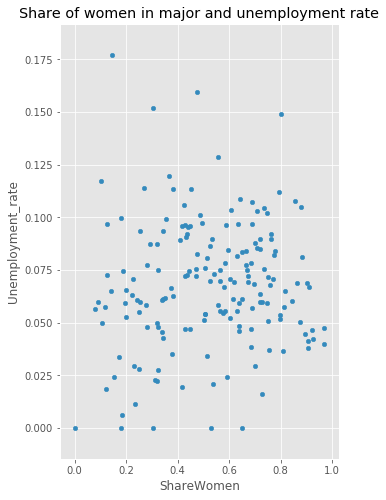

In [12]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', figsize=(5,8))
ax4.set_title('Share of women in major and unemployment rate')

Text(0.5, 1.0, 'Median salary of males')

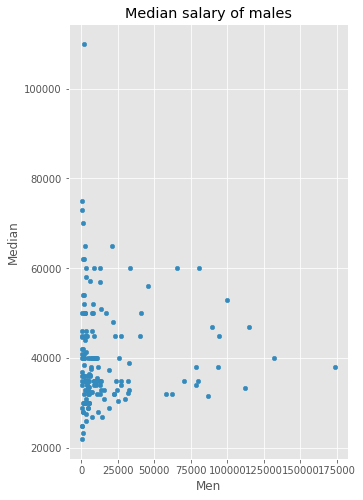

In [13]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter', figsize=(5,8))
ax5.set_title('Median salary of males')

Text(0.5, 1.0, 'Median salary of females')

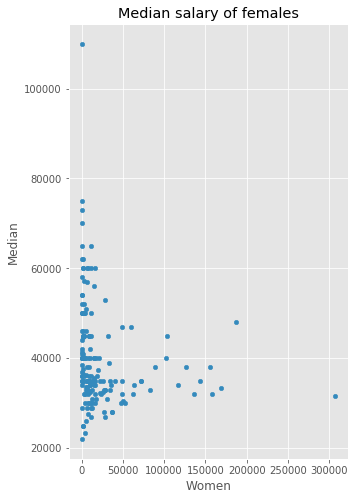

In [14]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter', figsize=(5,8))
ax6.set_title('Median salary of females')

Text(0.5, 1.0, 'Distribution of sample size')

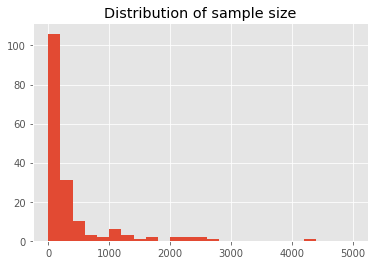

In [15]:
ax = recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
ax.set_title('Distribution of sample size')

Text(0.5, 1.0, 'Distribution of median salary')

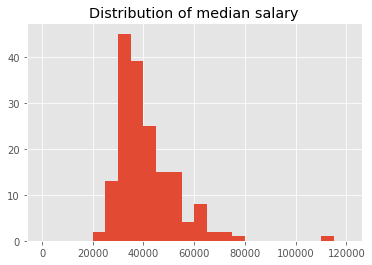

In [16]:
ax = recent_grads['Median'].hist(bins=24, range=(0,120000))
ax.set_title('Distribution of median salary')

This graph show that...

Text(0.5, 1.0, 'Distribution of employed graduates')

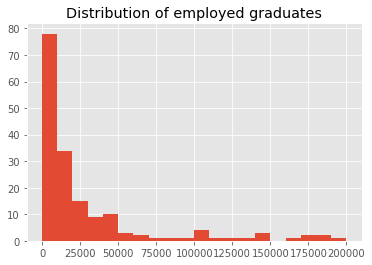

In [17]:
ax = recent_grads['Employed'].hist(bins=20, range=(0,200000))
ax.set_title('Distribution of employed graduates')

Text(0.5, 1.0, 'Distribution of full-time employed graduates')

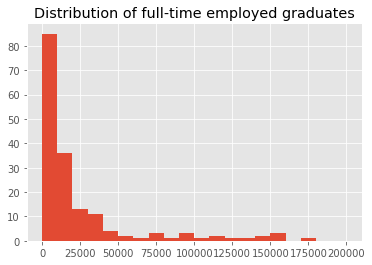

In [18]:
ax = recent_grads['Full_time'].hist(bins=20, range=(0,200000))
ax.set_title('Distribution of full-time employed graduates')

Text(0.5, 1.0, 'Distribution of percent of women in majors')

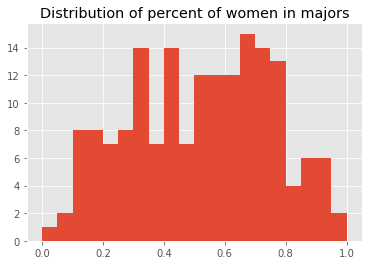

In [19]:
ax = recent_grads['ShareWomen'].hist(bins=20, range=(0,1))
ax.set_title('Distribution of percent of women in majors')

Text(0.5, 1.0, 'Distribution of unemployed graduates')

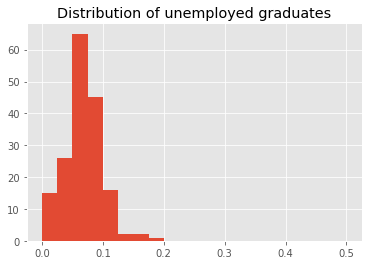

In [20]:
ax = recent_grads['Unemployment_rate'].hist(bins=20, range=(0,0.5))
ax.set_title('Distribution of unemployed graduates')

Text(0.5, 1.0, 'Distribution of male graduates')

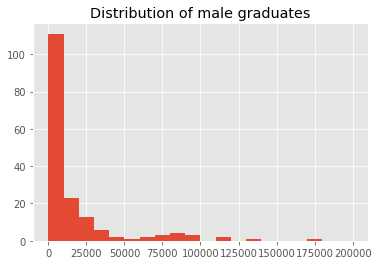

In [21]:
ax = recent_grads['Men'].hist(bins=20, range=(0,200000))
ax.set_title('Distribution of male graduates')

Text(0.5, 1.0, 'Distribution of female graduates')

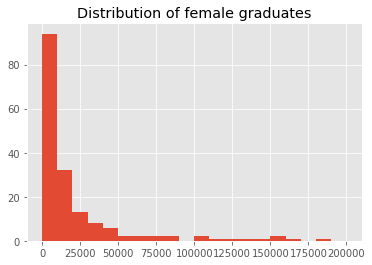

In [22]:
ax = recent_grads['Women'].hist(bins=20, range=(0,200000))
ax.set_title('Distribution of female graduates')

Results sth sth

Creating a scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266F3665A88>,
      dtype=object)

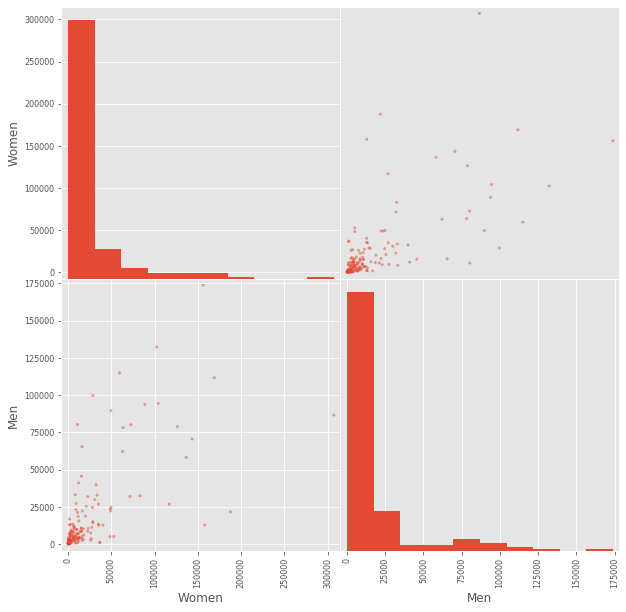

In [23]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266F361D088>,
      dtype=object)

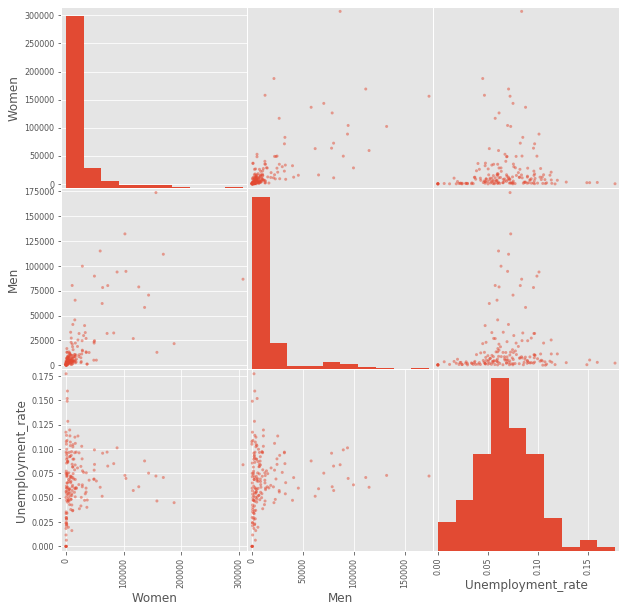

In [24]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men', 'Unemployment_rate']], figsize=(10,10))

Text(0.5, 1.0, 'Women in first majors')

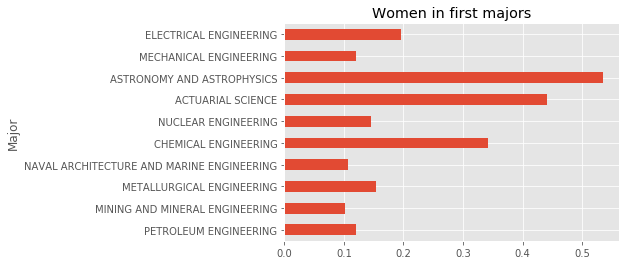

In [25]:
ax = recent_grads[:10].plot.barh(x='Major', y='ShareWomen')
ax.get_legend().remove()
ax.set_title('Women in first majors')

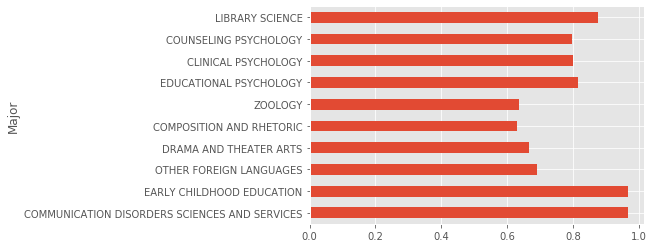

In [26]:
ax = recent_grads[-10:].plot.barh(x='Major', y='ShareWomen')
ax.get_legend().remove()